In [67]:
def BeamElementStiffness(E,I,L):
    """This function returns the element stiffness matrix for a beam element with modulus of elasticity E, 
    moment of inertia I, and length L. The size of the element stiffness matrix is 4 x 4."""

    y = E*I/(L*L*L) * np.array([[12, 6*L, -12, 6*L], [6*L, 4*L*L, -6*L, 2*L*L,],
                                [-12, -6*L, 12, -6*L], [6*L, 2*L*L, -6*L, 4*L*L,]])

    return y

In [68]:
def BeamAssemble(K,k,i,j):
    """"This function assembles the element stiffness matrix k of the beam element with nodes i and j 
    into the global stiffness matrix K. This function returns the global stiffness matrix K after the 
    element stiffness matrix k is assembled."""
    temp = [2*i-2, 2*i-1, 2*j-2, 2*j-1]
    for i in range(len(temp)):
        for j in range(len(temp)):
            K[temp[i], temp[j]] += k[i, j]
    
    return K


In [69]:
def BeamElementForces(k,u):
    """"This function returns the element nodal force vector given the element stiffness matrix k 
    and the element nodal displacement vector u.""" 
    return np.dot(k, u)

In [70]:
def BeamElementShearDiagram(f, L):
    """"This function plots the shear force diagram for the beam element with nodal 
    force vector f and length L."""
    
    x = [0, L]
    z = [f[0,0] , -f[2,0]]
    plt.plot(x,z)
    plt.ylabel('Shear Force (kN)')
    plt.show()

In [71]:
def BeamElementMomentDiagram(f, L):
    """"This function plots the shear force diagram for the beam element with nodal 
    force vector f and length L."""
    
    x = [0, L]
    z = [-f[1,0] , f[3,0]]
    plt.plot(x,z)
    plt.ylabel('Bending Moment (kN.m)')
    plt.show()

In [72]:
##Step 1 : Initializing the problem

import numpy as np
import matplotlib.pyplot as plt
E = 210e6
I = 60e-6
L1 = 2
L2 = 2
nodes = [1,2,3]
node_connections = [(1,2), (2,3)]
length = [L1, L2]

In [73]:
## Step 2 : Element Stiffness Matrices

k1 =  BeamElementStiffness(E,I,L1)
k2 =  BeamElementStiffness(E,I,L2)

element_stiffness = [k1,k2]

In [74]:
## Step 3 : Global Stiffness Matrix

K = np.zeros((2*len(nodes), 2*len(nodes)))
K = BeamAssemble(K,k1,1,2)
K = BeamAssemble(K,k2,2,3)

K

array([[ 18900.,  18900., -18900.,  18900.,      0.,      0.],
       [ 18900.,  25200., -18900.,  12600.,      0.,      0.],
       [-18900., -18900.,  37800.,      0., -18900.,  18900.],
       [ 18900.,  12600.,      0.,  50400., -18900.,  12600.],
       [     0.,      0., -18900., -18900.,  18900., -18900.],
       [     0.,      0.,  18900.,  12600., -18900.,  25200.]])

In [75]:
## Step 4 : Applying Boundary Conditions

U=np.zeros((len(nodes)*2,1))   
F=np.zeros((len(nodes)*2,1))   

U[0,0] = 0
U[1,0] = 0
U[4,0] = 0

F[2,0] = -20
F[3,0] = 0
F[5,0] = 0



In [76]:
## Step 5 : Solving the Equations

bound = [2,3,5]

Up=U[bound]
Fp=F[bound]
Kpp=K[bound]
Kpp=Kpp[:,bound]


Up=np.dot(np.linalg.inv(Kpp),Fp)
print("Nodal Displacements and rotations of Node 2 and Node 3[U2y Phi2 Phi3]")
print(Up)

Nodal Displacements and rotations of Node 2 and Node 3[U2y Phi2 Phi3]
[[-0.00092593]
 [-0.00019841]
 [ 0.00079365]]


In [77]:
## Post - processing

U[bound]=Up

F=np.dot(K,U)
print("Reactions at Node 1 and 3 [F1y, M1, F3y]")
print(F[[0,1,4]])

Reactions at Node 1 and 3 [F1y, M1, F3y]
[[13.75]
 [15.  ]
 [ 6.25]]


In [78]:
## Shear Force and Bending Moment

u = [] 
f = []
for node in node_connections:
    u1 = np.asarray([U[node[0]*2-2],U[node[0]*2-1],U[node[1]*2-2],U[node[1]*2-1]])
    u.append(u1)

for i in range(len(node_connections)):
    f1 = BeamElementForces(element_stiffness[i], u[i])
    f.append(f1)
    print("The shear Force and Bending Moment in Element " + str(i+1) + " is" + '\n', f1)


The shear Force and Bending Moment in Element 1 is
 [[ 13.75]
 [ 15.  ]
 [-13.75]
 [ 12.5 ]]
The shear Force and Bending Moment in Element 2 is
 [[ -6.25]
 [-12.5 ]
 [  6.25]
 [  0.  ]]


Shear Force Diagram for Element 1


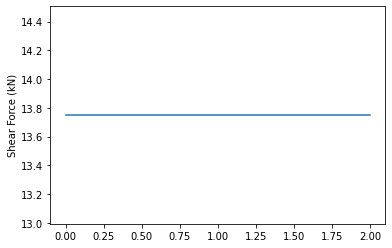

Bending Moment Diagram for Element 1


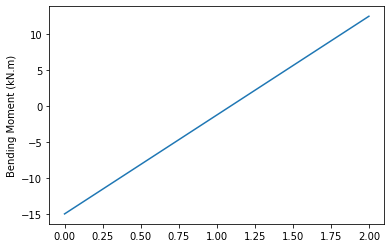

Shear Force Diagram for Element 2


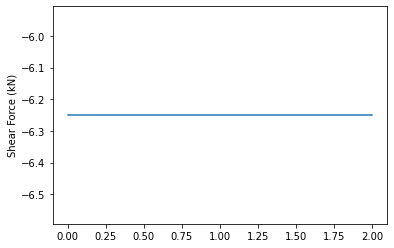

Bending Moment Diagram for Element 2


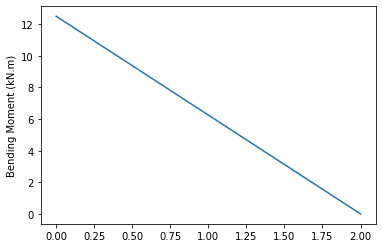

In [79]:
## SFD and BMD

for i in range(len(f)):
    print("Shear Force Diagram for Element "+ str(i+1))
    BeamElementShearDiagram(f[i],length[i])
    print("Bending Moment Diagram for Element "+ str(i+1))
    BeamElementMomentDiagram(f[i],length[i])
    